In [33]:
import numpy as np
from statistics import mean
import datetime
import matplotlib.pyplot as plt
import os

os.system('./stocks/download.bash')

# All lists and Dictionaries ordered from most recent to oldest
allData = {}

# Date,Open,High,Low,Close,Adj Close,Volume
# 1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400
# 1980-12-15,0.488839,0.488839,0.486607,0.486607,null,43971200
# ...
dirpath = 'stocks/quotes'
for file in os.listdir(dirpath):
    symbol = os.path.splitext(file)[0]
    print(symbol)
    path = dirpath + '/' + file
    dt = {'names':('date','open','high','low','close','adjclose','volume'),
        'formats':('U10',np.float, np.float, np.float, np.float, np.float, np.float)}
    npdata = np.genfromtxt(path, skip_header=1, dtype=dt, delimiter=',')
    allData[symbol] = npdata

CSCO
stocks/quotes/CSCO.csv
TLRY
stocks/quotes/TLRY.csv
BA
stocks/quotes/BA.csv
MDB
stocks/quotes/MDB.csv
SNE
stocks/quotes/SNE.csv
ZG
stocks/quotes/ZG.csv
V
stocks/quotes/V.csv
MO
stocks/quotes/MO.csv
ENPH
stocks/quotes/ENPH.csv
WBA
stocks/quotes/WBA.csv
T
stocks/quotes/T.csv
CGC
stocks/quotes/CGC.csv
NTDOY
stocks/quotes/NTDOY.csv
MSI
stocks/quotes/MSI.csv
EFA
stocks/quotes/EFA.csv
BAC
stocks/quotes/BAC.csv
EEM
stocks/quotes/EEM.csv
SKYW
stocks/quotes/SKYW.csv
STZ
stocks/quotes/STZ.csv
GWPH
stocks/quotes/GWPH.csv
F
stocks/quotes/F.csv
ADBE
stocks/quotes/ADBE.csv
SMCI
stocks/quotes/SMCI.csv
CRSP
stocks/quotes/CRSP.csv
DBX
stocks/quotes/DBX.csv
GRUB
stocks/quotes/GRUB.csv
AGG
stocks/quotes/AGG.csv
S
stocks/quotes/S.csv
MJ
stocks/quotes/MJ.csv
STX
stocks/quotes/STX.csv
NOC
stocks/quotes/NOC.csv
IEF
stocks/quotes/IEF.csv
BURL
stocks/quotes/BURL.csv
NVAX
stocks/quotes/NVAX.csv
SBUX
stocks/quotes/SBUX.csv
SNAP
stocks/quotes/SNAP.csv
MNKD
stocks/quotes/MNKD.csv
EADSY
stocks/quotes/EADSY.csv


In [27]:
sma50Avg = 0
sma50List = []
sma50Dic = {}

sma10Avg = 0
sma10List = []
sma10Dic = {}

def calcSMA(start, period, smaList, smaDic):
    if start+period-1 == len(closeList):
        return
    sma = mean(closeList[start:period+start])
    smaList.insert(start,sma)
    smaDic[dateList[start+period-1]] = sma
    calcSMA(start+1, period, smaList, smaDic)
    return smaList, smaDic
    
    
def calcAvgSMA(start, period):
    return mean(smaList[start:period])


#print("closeList Length=%d" %len(closeList))
calcSMA(0,50,sma50List,sma50Dic)
sma50Avg = calcAvgSMA(0,50)
print("sma50Avg=%f" %sma50Avg)
print("Sma50List Length=%d" %len(sma50List))
printList(sma50List, "SMA 50 List")
printDic(sma50Dic, "SMA 50 Dictionary")

calcSMA(0,10,sma10List,sma10Dic)
sma10Avg = calcAvgSMA(0,10)
print("sma10Avg=%f" %sma10Avg)
print("Sma10List Length=%d" %len(sma10List))
printList(sma10List, "SMA 10 List")
printDic(sma10Dic, "SMA 10 Dictionary")

#print(smaList)
#print(smaDic)

StatisticsError: mean requires at least one data point

In [303]:
dydxAvg = 0
dydx2Avg = 0
dydxList = []
dydx2List = []

def CalcDydx(l):
    global dydxList
    global dydxAvg
    dx = 1
    dydxList = list(numpy.diff(smaList) / dx)
    dydxAvg = mean(dydxList)

def calcDydx2():
    global dydx2List
    global dydx2Avg
    dx = 1
    dydx2List = list(numpy.diff(dydxList) / dx)
    dydx2Avg = mean(dydx2List)


calcDydx()
print("Dydx Length=%d" %len(dydxList))
print("Dydx2 Length=%d" %len(dydx2List))
printList(dydxList, "dy/dx List")
printList(dydx2List, "d2y/dx2 List")

Dydx Length=1209
Dydx2 Length=1208


dy/dx List:
-0.56400,	-0.51980,	-0.50960,	-0.49520,	
-0.43460,	-0.52160,	-0.43540,	-0.35380,	
-0.29280,	-0.19560,	-0.22060,	-0.15340,	
-0.07840,	-0.10460,	-0.11200,	-0.06740,	
-0.05140,	0.05380,	0.11520,	0.28800,	
0.15560,	0.18740,	0.20100,	0.09620,	
0.08420,	0.02700,	0.05080,	0.05600,	
0.29220,	0.54020,	0.49940,	0.43100,	
0.75100,	0.75740,	0.93420,	1.11580,	
1.12060,	1.00940,	0.89540,	1.03240,	
1.34560,	1.31580,	1.26600,	1.19900,	
1.25000,	1.32980,	1.28680,	1.49600,	
1.44780,	1.54240,	1.16200,	1.26900,	
1.31840,	1.22420,	1.29880,	1.35240,	
1.31260,	1.40080,	1.25760,	1.16440,	
1.28100,	1.33180,	1.16660,	1.16320,	
1.14220,	1.10700,	1.03860,	0.94940,	
0.88200,	0.65680,	0.82900,	0.77640,	
0.74600,	0.87280,	0.98440,	1.08240,	
0.88580,	0.93740,	0.64940,	0.55540,	
0.63380,	0.80140,	0.72260,	0.66920,	
0.41120,	0.28980,	0.19500,	0.28340,	
0.29140,	0.16020,	-0.14340,	-0.07640,	
0.04320,	0.10680,	-0.05960,	-0.19120,	
-0.10680,	-0.27720,	-0.26240,	-0.20860,	
-

0.00420,	-0.02440,	0.05960,	-0.04220,	
-0.01580,	0.01420,	0.07840,	0.06020,	
-0.01880,	-0.02860,	0.01110,	0.06190,	
-0.01260,	-0.03240,	-0.04040,	0.02380,	
0.01980,	-0.01360,	0.01040,	-0.03460,	
-0.02360,	0.02000,	-0.16300,	0.00900,	
-0.02440,	-0.00360,	-0.00760,	-0.04540,	
-0.01280,	0.01980,	-0.00360,	-0.00120,	
-0.00360,	-0.01280,	0.06260,	0.01480,	
-0.01840,	-0.01240,	0.01000,	-0.05840,	
0.01760,	-0.01140,	-0.00200,	0.04760,	
-0.00360,	0.01120,	-0.00560,	-0.01100,	
0.00500,	0.00140,	-0.01500,	0.00300,	
-0.01960,	0.04340,	0.00120,	-0.03240,	
0.01560,	-0.04820,	-0.01360,	-0.00200,	
-0.00930,	0.01250,	0.00160,	0.05520,	
0.04220,	-0.00380,	0.01200,	-0.00100,	
0.03620,	0.02280,	-0.02240,	-0.00660,	
0.14880,	-0.06320,	-0.03440,	0.05460,	
-0.01160,	0.10000,	0.00140,	-0.01140,	
-0.02700,	0.01560,	0.03500,	0.01720,	
0.03680,	-0.00640,	0.02800,	0.02460,	
0.07480,	0.01400,	-0.00920,	0.00660,	
0.00780,	-0.01120,	0.00100,	-0.00840,	
0.00180,	0.01180,	-0.03620,	-0.00280,	
-0.03360,	0.01000,	-0.01

In [421]:
#  (12 * (p0 / p1 – 1))
# + (4 * (p0 / p3 – 1))
# + (2 * (p0 / p6 – 1))
# +      (p0 / p12 – 1)
# Where p0 = the asset price at today’s close, 
# p1 = the asset price at the close of the previous month, etc.

today = datetime.datetime.today().strftime('%Y/%m/%d')
momentum = [0 for x in range(0,4)]
confidence = 0

def dayDif(d1, d2):
    d1 = datetime.strptime(d1, '%Y/%m/%d')
    d2 = datetime.strptime(d2, '%Y/%m/%d')
    return abs((d2 - d1).days)
    
def calcMomentum():
    global momentum
    p0=0.0; p1=0.0; p3=0.0; p6=0.0; p12=0.0
    months = ['12','11','10','09','08','07','06','05','04','03','02','01','12','11','10','09','08','07','06','05','04','03','02','01']
    p0_mn = dateList[0][5:7] # current month
    p1_mn = months[months.index(p0_mn)+1]
    p3_mn = months[months.index(p0_mn)+3]
    p6_mn = months[months.index(p0_mn)+6]
    p12_mn = months[months.index(p0_mn)+12]
    
    #print("p0_mn=%s, p1_mn=%s, p3_mn=%s, p6_mn=%s, p12_mn=%s" %(p0_mn,p1_mn,p3_mn,p6_mn,p12_mn))
    for d in dateList:
        dates = d.split("/")
        if dates[1] == p0_mn and p0 == 0:
            p0 = float(closeDic[d])
            #print("%s : p0=%f\n" %(d,p0))
        elif dates[1] == p1_mn and p1 == 0:
            p1 = float(closeDic[d])
            #print("%s : p1=%f\n" %(d,p1))
        elif dates[1] == p3_mn and p3 == 0:
            p3 = float(closeDic[d])
            #print("%s : p3=%f\n" %(d,p3))
        elif dates[1] == p6_mn and p6 == 0:
            p6 = float(closeDic[d])
            #print("%s : p6=%f\n" %(d,p6))
        elif dates[1] == p12_mn and p12 == 0 and p6 != 0: 
            p12 = float(closeDic[d])
            #print("%s : p12=%f\n" %(d,p12))
            break
    
    #print("p0=%f, p1=%f, p3=%f, p6=%f, p12=%f" %(p0,p1,p3,p6,p12))
    momentum[0] = 12 * (p0 / p1 - 1)
    momentum[1] = 4 * (p0 / p3 - 1)
    momentum[2] = 2 * (p0 / p6 - 1)
    momentum[3] = 1 * (p0 / p12 - 1)
    print("momentum[0]=%f \nmomentum[1]=%f \nmomentum[2]=%f\nmomentum[3]=%f" %(momentum[0],momentum[1],momentum[2],momentum[3]))
    confidence = momentum[0] + momentum[1] + momentum[2] + momentum[3]
    return confidence


print("Today is %s" %today)
confidence = calcMomentum()
print("Confidence: %f" %confidence)
#printDateList()
printList(momentum, "Momentum List")

Today is 2019/03/18
momentum[0]=0.898874 
momentum[1]=0.719665 
momentum[2]=-0.351023
momentum[3]=0.109310
Confidence: 1.376826


Momentum List:
0.89887,	0.71967,	-0.35102,	0.10931,	



In [637]:
ema10List = [None for x in closeList]
ema10Dic = {}


# starts from bottom of list
def calcEMA(start, period, emaList, emaDic,smaList):
    if period == 10: smaList = sma10List
    elif period == 50: smaList = sma50List
    
    print("params: %d, %d - " %(start,period))
    if start == 0:
        return
    if start > len(closeList)-period-1:
        print(start)
        print(len(smaList))
        #print(smaList[start])
        emaList.insert(start,smaList[start])
        emaDic[dateList[start]] = smaList[start]
    else:
        smoothing = 2 / (period + 1)
        w = smoothing / (period + 1)
        #print(len(emaList))
        ema = (closeList[start] * w) + (emaList[start+1] * (1 - w))
        #print("EMA=%f - " %ema, end="")
        if ema != 0:
            emaList.insert(start,ema)
            emaDic[dateList[start]] = ema
        #print(emaList[start])
    calcEMA(start-1,period,emaList,emaDic,smaList)
    return emaList,emaDic

'''
def calcSMA(start, period, smaList, smaDic):
    if start+period-1 == len(closeList):
        return
    sma = mean(closeList[start:period+start])
    smaList.insert(start,sma)
    smaDic[dateList[start+period-1]] = sma
    calcSMA(start+1, period, smaList, smaDic)
    return smaList, smaDic
'''

ema10List,ema10Dic = calcEMA(len(closeList)-1,10,ema10List,ema10Dic,sma10List)
#ema10List = calcEMA2(len(closeList)-1,10,ema10List,ema10Dic)
#ema10List = ema10List.reverse()
#printDic(ema10Dic, "EMA 10 Dictionary")

params: 1258, 10 - 
1258
1250


IndexError: list index out of range

[]


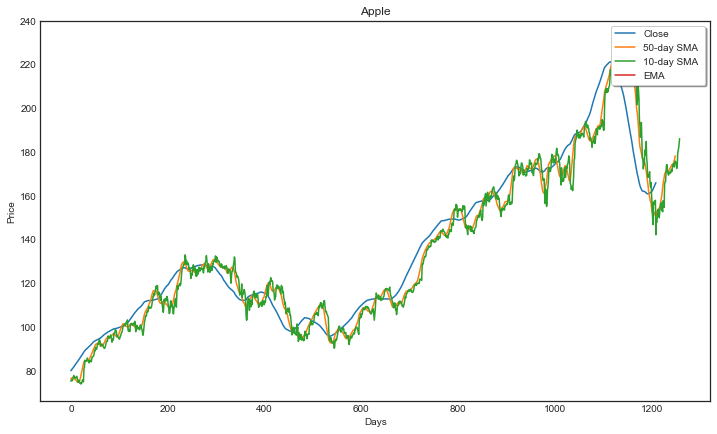

In [640]:
legendList = ["Close", "50-day SMA", "10-day SMA ","EMA"]

def graph(*args): 
    i = 0 
    for arg in args:
        #arg = scale(arg)
        x = [z for z in range(0,len(arg))]
        y = []
        for v in arg:
            y.append(float(v))
        y.reverse()
        plt.plot(x,y,label=legendList[i])
        i += 1
def plotGraph(): 
    plt.figure(figsize=(12,7)) 
    plt.style.use('seaborn-white') 
    tmp = list(ema10Dic.values())
    print(tmp)
    graph(sma50List,sma10List,closeList,tmp)
    plt.title("Apple")
    plt.ylabel("Price")
    plt.xlabel("Days")
    plt.legend(loc = 1, frameon = True, fancybox = True, shadow = True)    
    plt.show()

plotGraph()